In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

In [11]:
data = pd.read_csv("../../data/cleanedDatasetWithFeatures.csv")

In [12]:
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('Unnamed: 0.1', inplace=True, axis=1)

In [13]:
data.head()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0
1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0
2,ภาพจำ,1,2018-04-12,Pop Pongkool,https://open.spotify.com/track/4YRpjJaJpiI36HM...,Thailand,15477.0,0.557,0.585,5.0,-7.559,0.0470,0.426,0.000001,0.1440,0.4640,81.922,274000.0
3,Te Boté - Remix,1,2018-04-27,"Nio Garcia, Casper Magico, Bad Bunny, Darell, ...",https://open.spotify.com/track/3V8UKqhEK5zBkBb...,Honduras,12869.0,0.903,0.675,11.0,-3.445,0.2140,0.542,0.000013,0.0595,0.4420,96.507,417920.0
4,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0


# Most streamed artist

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Streams')

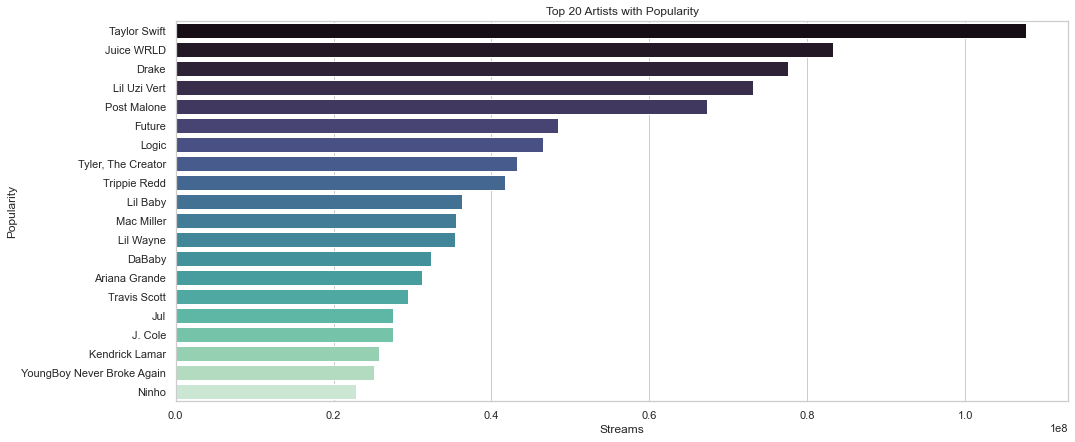

In [148]:


fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("artist")['streams'].sum().sort_values(ascending = False).head(20)
axis = sns.barplot(popular, popular.index, palette="mako", orient='h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Streams')

In [15]:
taylor = data[data['artist'] == 'Taylor Swift']
taylor

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
146,cardigan,1,2020-07-26,Taylor Swift,https://open.spotify.com/track/4R2kfaDFhslZEMJ...,Hong Kong,18211.0,0.613,0.581,0.0,-8.588,0.0424,0.53700,0.000345,0.2500,0.551,130.033,239560.0
292,You Need To Calm Down,1,2019-06-14,Taylor Swift,https://open.spotify.com/track/29fRTIKsJhLUJol...,United States,2459661.0,0.768,0.678,2.0,-5.604,0.0505,0.00838,0.000000,0.0596,0.706,85.025,171387.0
706,willow,1,2020-12-12,Taylor Swift,https://open.spotify.com/track/3Uo7WG0vmLQ07WB...,United States,2209417.0,0.392,0.579,7.0,-9.195,0.1640,0.83500,0.001790,0.1450,0.549,80.961,214707.0
717,All Too Well (10 Minute Version) (Taylor's Ver...,1,2021-11-13,Taylor Swift,https://open.spotify.com/track/5enxwA8aAbwZbf5...,New Zealand,41345.0,0.631,0.518,0.0,-8.771,0.0303,0.27400,0.000000,0.0880,0.205,93.023,613027.0
907,Look What You Made Me Do,1,2017-09-24,Taylor Swift,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,Hong Kong,13855.0,0.773,0.680,9.0,-6.378,0.1410,0.21300,0.000016,0.1220,0.497,128.062,211859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84331,All You Had To Do Was Stay,144,2017-06-10,Taylor Swift,https://open.spotify.com/track/4NNolUeL5m2ju7k...,Philippines,21602.0,0.602,0.735,5.0,-5.778,0.0337,0.00196,0.000048,0.1050,0.472,96.969,193293.0
85370,This Is Why We Can’t Have Nice Things,147,2017-12-01,Taylor Swift,https://open.spotify.com/track/0fF2vHE8TaB4XHE...,United States,241566.0,0.567,0.789,5.0,-5.986,0.1150,0.01560,0.000000,0.3820,0.438,163.960,207133.0
89135,Fifteen,157,2017-06-10,Taylor Swift,https://open.spotify.com/track/4t0OI7XrODjSkAu...,Philippines,20803.0,0.556,0.651,7.0,-4.396,0.0266,0.06700,0.000000,0.1450,0.203,95.485,294333.0
92933,Cornelia Street - Live From Paris,167,2020-05-19,Taylor Swift,https://open.spotify.com/track/3fGnrtrtL1IHSX9...,Philippines,24847.0,0.502,0.462,11.0,-7.526,0.0265,0.57800,0.000000,0.7210,0.304,97.085,296013.0


In [136]:
data2 = data[data['artist'] == "Taylor Swift"]

In [133]:
data2 = data[data['rank'] < 1]

In [143]:
data2.shape

(156, 18)

<AxesSubplot:>

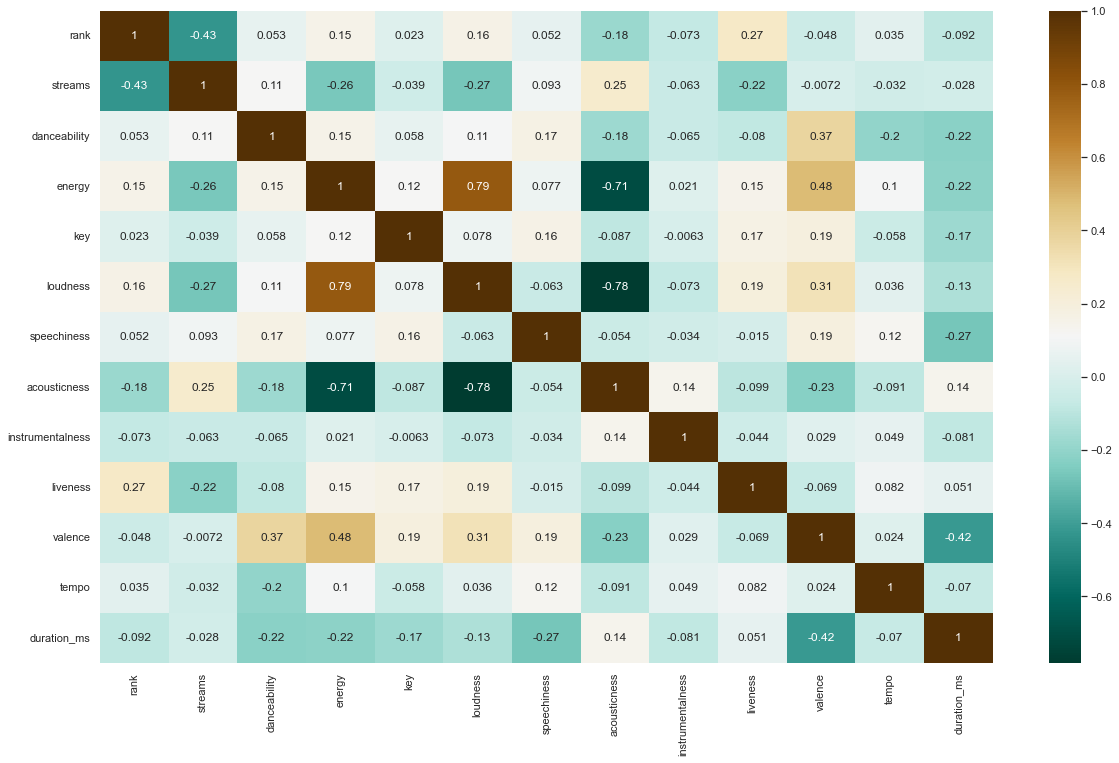

In [145]:
plt.figure(figsize=(20,12))
sns.set(style="whitegrid")
corr = data2.corr()
sns.heatmap(corr,annot=True, cmap='BrBG_r', annot_kws={"fontsize":12}) # cmap='BrBG_r',

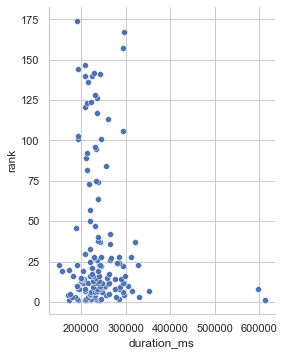

In [147]:
sns.pairplot(data2, x_vars=['duration_ms'], y_vars='rank', height=5, aspect=0.8)

- **Dancability** :  A value of 0.0 is least danceable and 1.0 is most danceable
- **Acousticness** : 1.0 represents high confidence the track is acoustic
- **Loudness** : The overall loudness of a track in decibels (dB)
- **Valence** : Tracks with high valence sound more positive (e.g. happy, cheerful), 
    while tracks with low valence sound more negative (e.g. sad, depressed, angry).

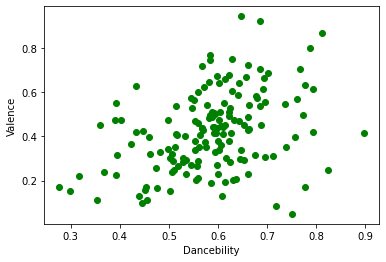

In [119]:
# Plot all
plt.ylabel('Valence')
plt.xlabel('Dancebility')
plt.scatter(data2.danceability, data2.valence, color='green')
plt.show()

In [139]:
data3 = pd.read_csv('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv')

In [140]:
data3.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


KeyError: "['rank'] not in index"

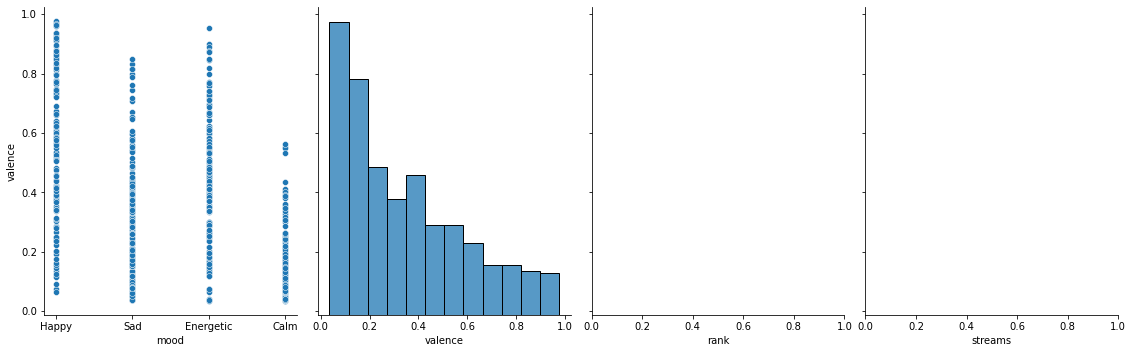